In [7]:
import os
import tempfile
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
plt.rc('text', usetex=True)


def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    

def tex2png(tex_expression, filename, font_size=20, dpi=300):
    fig, ax = plt.subplots()
    ax.text(0, 0, tex_expression, size=font_size)
    ax.axis('off')
    temp_file = tempfile.TemporaryFile()
    temp_file.close()
    fig.savefig(temp_file.name, dpi=dpi, transparent=True, format="png", 
                bbox_inches='tight', pad_inches=0.0)
    plt.close()
    bg = Image.open(temp_file.name)
    croped_im = trim(bg)
    croped_im.save(filename, format="png")
    os.remove(temp_file.name)
    return croped_im
    

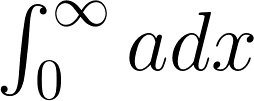

In [8]:
tex2png(r"$\int_{0}^{\infty} a dx$", "new_test.png")